In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics as sts

In [2]:
fifa = pd.read_csv('fifa.csv')

In [3]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa.shape

(18207, 60)

In [5]:
fifa[fifa.duplicated()].shape[0]

0

The given fifa csv file has no dupicate entries

In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [7]:
fifa.columns = fifa.columns.str.replace(' ','_')

In [8]:
fifa.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club_Logo                       0
Value                           0
Wage                            0
Preferred_Foot                 48
International_Reputation       48
Weak_Foot                      48
Skill_Moves                    48
Work_Rate                      48
Body_Type                      48
Position                       60
Jersey_Number                  60
Joined                       1553
Loaned_From                 16943
Contract_Valid_Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [9]:
fifa.describe()

,ID,Age,Overall,Potential,International_Reputation,Weak_Foot,Skill_Moves,Jersey_Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [10]:
# 42 numerical columns and 18 categorical columns.
# If we observe, there are columns named ID, Photo, Nationality, 

In [11]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Preferred_Foot',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate',
       'Body_Type', 'Position', 'Jersey_Number', 'Joined', 'Loaned_From',
       'Contract_Valid_Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release_Clause'],
      dtype='object')

We found some 9 columns to be useless for us as they don’t contribute much for our analysis. So they all have been dropped from the fifa dataset. Yet for future refereneces, they have been saved in a separate DataFrame called, fifa_dropped_data.

In [12]:
fifa_dropped_data = fifa[['Photo', 'Nationality', 'Flag', 'Club', 'Club_Logo', 'Preferred_Foot', 'Body_Type', 'Jersey_Number', 'Loaned_From']]
print(fifa_dropped_data.shape)
fifa_dropped_data.head(2)

(18207, 9)


,Photo,Nationality,Flag,Club,Club_Logo,Preferred_Foot,Body_Type,Jersey_Number,Loaned_From
0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,Left,Messi,10.0,NaN
1,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,Right,C. Ronaldo,7.0,NaN


We have dropped the unnecessary data from the fifa dataset. Hence we can see the reduction in the number of columns the dataset has.

In [13]:
fifa.drop(columns=['Photo', 'Nationality', 'Flag', 'Club', 'Club_Logo', 'Preferred_Foot', 'Body_Type', 'Jersey_Number', 'Loaned_From'], inplace=True)

In [14]:
fifa.shape

(18207, 51)

We are going to purify the data within its respective columns.

In [15]:
fifa.head(2)

,ID,Name,Age,Overall,Potential,Value,Wage,International_Reputation,Weak_Foot,Skill_Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
0,158023,L. Messi,31,94,94,€110.5M,€565K,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,94,94,€77M,€405K,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [16]:
fifa['Value'] = fifa['Value'].fillna('10')

def value_conversion(x):
    if (x[-1] == 'M'):
        return float(x[0:-1])*1000000
    elif (x[-1] == "K"):
        return float(x[0:-1])*1000
    else:
        return float(x)

fifa['Value'] = fifa['Value'].apply(lambda x: x[1:])

fifa['Value'] = fifa['Value'].map(value_conversion)

fifa['Value'] = fifa['Value'].replace('10',np.nan)

fifa['Value'].value_counts()

1100000.0      431
375000.0       372
425000.0       354
325000.0       351
450000.0       343
              ... 
36000000.0       1
72000000.0       1
102000000.0      1
58000000.0       1
43000000.0       1
Name: Value, Length: 217, dtype: int64

In [17]:
# Similarly we need to alter the format of 'Wage' column.

In [18]:
fifa['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [19]:
fifa['Wage'] = fifa['Wage'].fillna('10')

def value_conversion(x):
    if (x[-1] == 'M'):
        return float(x[0:-1])*1000000
    elif (x[-1] == "K"):
        return float(x[0:-1])*1000
    else:
        return float(x)

fifa['Wage'] = fifa['Wage'].apply(lambda x: x[1:])

fifa['Wage'] = fifa['Wage'].map(value_conversion)

fifa['Wage'] = fifa['Wage'].replace('10',np.nan)

fifa['Wage'].value_counts()

1000.0      4900
2000.0      2827
3000.0      1857
4000.0      1255
5000.0       869
            ... 
380000.0       1
230000.0       1
565000.0       1
200000.0       1
245000.0       1
Name: Wage, Length: 144, dtype: int64

In [20]:
# altering the fifa['joined'] data

In [21]:
fifa['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
18202     May 3, 2017
18203    Mar 19, 2018
18204     Jul 1, 2017
18205    Apr 24, 2018
18206    Oct 30, 2018
Name: Joined, Length: 18207, dtype: object

In [22]:
fifa['Joined'] = pd.DatetimeIndex(fifa['Joined']).year

In [23]:
fifa['Joined'].isna().sum()

1553

In [24]:
# we fill the Nan Joined values as mean value, but since it is a year, we are rounding the mean to zero decimals

In [25]:
fifa['Joined'].fillna(int(fifa['Joined'].mean()),inplace=True)

In [26]:
fifa['Joined'].isna().sum()

0

In [27]:
fifa['Joined'] = fifa['Joined'].astype('int')

In [28]:
fifa['Joined'].dtype

dtype('int32')

In [29]:
fifa['Joined'].value_counts()

2018    6569
2017    4307
2016    3799
2015    1336
2014     818
2013     458
2012     340
2011     201
2010     131
2009      78
2008      53
2007      38
2006      18
2005      17
2003      13
2004      12
2002      10
1998       3
2001       2
2000       2
1999       1
1991       1
Name: Joined, dtype: int64

In [30]:
# convert 'Contract_Valid_Until' from Date as String to datetime type

In [31]:
fifa['Contract_Valid_Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract_Valid_Until, dtype: object

In [32]:
fifa['Contract_Valid_Until'] = pd.to_datetime(fifa['Contract_Valid_Until'])

In [33]:
fifa['Contract_Valid_Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract_Valid_Until, dtype: datetime64[ns]

In [34]:
fifa['Contract_Valid_Until'].dtype

dtype('<M8[ns]')

In [35]:
# Height, In inches with a quotation mark , Convert to Float with decimal points.

In [36]:
fifa['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [37]:
fifa['Height'] = fifa['Height'].str.replace("'",".")
#fifa['Height'] = fifa['Height'].astype('float')

In [38]:
l = len(fifa['Height'])
for i in range(l):
    div = fifa['Height'][i].split(".")
    inch = int(div[0])*12 + int(div[1])
    fifa['Height'][i] = round(inch*2.54/100,2)
    print(fifa['Height'][i])

C:\Users\Karangula\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1.7
1.88
1.75
1.93
1.8
1.73
1.73
1.83
1.83
1.88
1.83
1.83
1.88
1.73
1.68
1.78
1.88
1.75
1.88
1.98
1.88
1.85
1.93
1.73
1.88
1.78
1.75
1.85
1.8
1.63
1.75
1.8
1.73
1.88
1.91
1.75
1.85
1.88
1.85
1.83
1.93
1.93
1.83
1.8
1.88
1.93
1.85
1.91
1.85
1.7
1.7
1.88
1.83
1.83
1.93
1.83
1.73
1.88
1.75
1.93
1.7
1.8
1.91
1.65
1.8
1.73
1.85
1.75
1.8
1.78
1.91
1.85
1.78
1.88
1.8
1.78
1.7
1.88
1.91
1.83
1.73
1.91
1.75
1.83
1.78
1.8
1.75
1.75
1.88
1.83
1.83
1.83
1.96
1.7
1.75
1.93
1.8
1.85
1.93
1.88
1.88
1.75
1.98
1.8
1.85
1.85
1.83
1.91
1.88
1.96
1.88
1.85
1.8
1.88
1.78
1.96
1.83
1.88
1.88
1.83
1.88
1.8
1.78
1.73
1.75
1.83
1.83
1.88
1.88
1.78
1.75
1.91
1.93
1.93
1.78
1.83
1.8
1.78
1.8
1.91
1.75
1.88
1.75
1.88
1.75
1.8
1.85
1.88
1.78
1.88
1.91
1.65
1.88
1.75
1.8
1.78
1.75
1.78
1.85
1.88
1.88
1.73
1.8
1.7
1.78
1.96
1.91
1.8
1.93
1.88
1.75
1.8
1.73
1.8
1.8
1.91
1.75
1.85
1.78
1.75
1.85
1.88
1.88
1.75
1.88
1.75
1.75
1.88
1.8
1.93
1.75
1.93
1.78
1.83
1.78
1.78
1.91
1.88
1.75
1.78
1.88
1.91
1.91
1.85
1.96
1.78


1.65
1.78
1.68
1.7
1.83
1.91
1.78
1.88
1.85
1.85
1.8
1.75
1.73
1.85
1.88
1.75
1.88
1.75
1.8
1.78
1.78
1.75
1.88
1.96
1.88
1.83
1.8
1.75
1.78
1.73
1.85
1.85
1.91
1.75
1.78
1.83
1.88
1.85
1.93
1.75
1.96
1.83
1.68
1.75
1.93
1.83
1.83
1.88
1.91
1.85
1.8
1.78
1.85
1.83
1.8
1.85
1.75
1.8
1.7
1.75
1.88
1.78
1.88
1.8
1.78
1.83
1.75
1.78
1.83
1.93
1.73
1.78
1.83
1.78
1.75
1.83
1.83
1.78
1.88
1.83
1.75
1.8
1.78
1.78
1.75
1.68
1.75
1.83
1.85
1.91
1.91
1.78
1.78
1.88
1.98
1.88
1.85
1.91
1.83
1.75
1.75
1.8
1.73
1.73
1.78
1.83
1.83
1.93
1.83
1.91
1.83
1.78
1.8
1.85
1.83
1.7
1.78
1.91
1.91
1.88
1.75
1.83
1.83
1.91
1.83
1.73
1.83
1.83
1.7
1.83
1.85
1.75
1.88
1.85
1.83
1.75
1.88
1.83
1.8
1.83
1.78
1.83
1.83
1.83
1.88
1.8
1.8
1.83
1.93
1.75
1.83
1.78
1.8
1.85
1.91
1.78
1.83
1.83
1.73
1.78
1.85
1.8
1.88
1.78
1.85
1.78
1.88
1.68
1.85
1.83
1.88
1.88
1.75
1.83
1.75
1.93
1.83
1.88
1.75
1.91
1.8
1.78
1.7
1.93
1.93
1.75
1.88
1.75
1.8
1.78
1.85
1.83
1.78
1.83
1.88
1.75
1.91
1.75
1.83
1.91
1.88
1.73
1.78
1.8
1.8

1.7
1.73
1.88
1.7
1.85
1.8
1.83
1.7
1.91
1.78
1.78
1.75
1.8
1.8
1.88
1.91
1.75
1.85
1.88
1.75
1.78
1.93
1.85
1.73
1.8
1.93
1.78
1.8
1.88
1.85
1.85
1.75
1.75
1.96
1.83
1.85
1.8
1.85
1.8
1.85
1.8
1.7
1.88
1.78
1.88
1.6
1.75
1.75
1.88
1.73
1.85
1.73
1.8
1.78
1.93
1.83
1.8
1.88
1.83
1.7
1.85
1.88
1.83
1.83
1.73
1.83
1.85
1.88
1.8
1.93
1.8
1.85
1.78
1.8
1.73
1.78
1.75
1.85
1.8
1.78
1.7
1.83
1.8
1.78
1.83
1.68
1.73
1.78
1.75
1.8
1.96
1.78
1.73
1.85
1.83
1.88
1.83
1.78
1.93
1.83
1.93
1.8
1.83
1.85
1.75
1.8
1.78
1.8
1.7
1.83
1.83
1.91
1.8
1.78
1.83
1.83
1.8
1.78
1.73
1.88
1.85
1.85
1.68
1.88
1.83
1.75
1.85
1.78
1.78
1.75
1.73
1.78
1.7
1.83
1.93
1.83
1.88
1.78
1.7
1.73
1.93
1.73
1.93
1.83
1.73
1.73
1.85
1.8
1.88
1.88
1.83
1.8
1.83
1.88
1.83
1.78
1.75
1.91
1.65
1.85
1.7
1.8
1.91
1.8
1.83
1.88
1.78
1.85
1.7
1.8
1.78
1.83
1.85
1.7
1.88
1.78
1.75
1.7
1.7
1.75
1.88
1.7
1.83
1.78
1.8
1.73
1.88
1.7
1.78
1.85
1.78
1.8
1.78
1.85
1.93
1.83
1.88
1.78
1.75
1.68
1.78
1.75
1.93
1.83
1.88
1.75
1.88
1.68
1.75


1.8
1.85
2.01
1.83
1.91
1.8
1.78
1.78
1.83
1.88
1.8
1.8
1.85
1.78
1.75
1.85
1.85
1.8
1.75
1.8
1.78
1.75
1.85
1.7
1.83
1.85
1.73
1.93
1.75
1.83
1.8
1.78
1.96
1.88
1.8
1.75
1.75
1.8
1.78
1.78
1.85
1.91
1.83
1.7
1.83
1.83
1.85
1.78
1.75
1.78
1.96
1.7
1.85
1.85
1.73
1.96
1.83
1.85
1.8
1.91
1.7
1.75
1.75
1.85
1.68
1.88
1.91
1.75
1.93
1.83
1.83
1.85
1.91
1.8
1.78
1.7
1.75
1.65
1.8
1.8
1.68
1.88
1.85
1.88
1.75
1.75
1.68
1.8
1.8
1.65
1.96
1.7
1.83
1.75
1.75
1.75
1.83
1.85
1.75
1.7
1.88
1.91
1.91
1.91
1.8
1.88
1.91
1.88
1.83
1.83
1.91
1.78
1.88
1.83
1.78
1.83
1.78
1.85
1.83
1.78
1.78
1.93
1.75
1.83
1.88
1.75
1.85
1.91
1.8
1.88
1.83
1.6
1.88
1.96
1.93
1.93
1.91
1.83
1.78
1.8
1.96
1.75
1.83
1.93
1.91
1.73
1.88
1.75
1.83
1.8
1.8
1.73
1.73
1.88
1.68
1.75
1.78
1.75
1.78
1.8
1.8
1.88
1.73
1.91
1.88
1.75
1.78
1.8
1.78
1.78
1.7
1.91
1.85
1.75
1.93
1.78
1.75
1.85
1.83
1.85
1.98
1.88
1.85
1.85
1.8
1.88
1.8
1.73
1.83
1.8
1.78
1.65
1.83
1.93
1.73
1.88
1.8
1.75
1.83
1.8
1.83
1.85
1.73
1.7
1.65
1.75
1.8
1.68

1.85
1.83
1.75
1.78
1.88
1.78
1.83
1.8
1.83
1.78
1.83
1.83
1.75
1.8
1.7
1.85
1.8
1.88
1.75
1.8
1.78
1.75
1.73
1.88
1.91
1.8
1.83
1.83
1.88
1.75
1.78
1.85
1.78
1.85
1.85
1.83
1.83
1.78
1.75
1.88
1.83
1.7
1.83
1.83
1.83
1.75
1.96
1.78
1.7
1.73
1.83
1.73
1.8
1.93
1.85
1.78
1.93
1.78
1.78
1.83
1.8
1.85
1.85
1.8
1.78
1.7
1.75
1.88
1.8
1.75
1.73
1.91
1.83
1.83
1.8
1.88
1.83
1.91
1.75
1.75
1.8
1.85
1.85
1.85
1.88
1.78
1.78
1.83
1.88
1.78
1.8
1.73
1.7
1.78
1.83
1.78
1.8
1.78
1.8
1.75
1.75
1.83
1.88
1.83
1.91
1.78
1.85
1.88
1.93
1.8
1.91
1.88
1.85
1.8
1.88
1.68
1.83
1.83
1.78
1.78
1.96
1.85
1.83
1.63
1.75
1.8
1.8
1.93
1.7
1.88
1.83
1.73
1.7
1.88
1.75
1.83
1.78
1.7
1.8
1.78
1.75
1.88
1.8
1.85
1.85
1.78
1.88
1.78
1.83
1.88
1.85
1.8
1.8
1.88
1.75
1.78
1.85
1.85
1.85
1.83
1.78
1.88
1.73
1.83
1.83
1.7
1.83
1.91
1.83
1.8
1.85
1.85
1.83
1.85
1.7
1.83
1.68
1.65
1.85
1.8
1.68
1.8
1.75
1.73
1.78
1.91
1.78
1.75
1.88
1.8
1.88
1.7
1.83
1.93
1.83
1.75
1.73
1.75
1.63
1.88
1.83
1.78
1.88
1.8
1.85
1.85
1.88
1.7

1.93
1.85
1.73
1.83
1.85
1.85
1.85
1.93
1.75
1.73
1.78
1.7
1.8
1.75
1.83
1.93
1.78
1.85
1.7
1.8
1.8
1.91
1.93
1.88
1.78
1.7
1.93
1.83
1.83
1.83
1.85
1.8
1.83
1.73
1.7
1.83
1.83
1.91
1.8
1.96
1.91
1.78
1.75
1.73
1.83
1.93
1.83
1.8
1.91
1.7
1.83
1.78
1.85
1.75
1.78
1.88
1.83
1.75
1.8
1.83
1.88
1.83
1.83
1.8
1.75
1.88
1.7
1.73
1.75
1.93
1.83
1.8
1.96
1.75
1.75
1.91
1.93
1.83
1.91
1.8
1.93
1.7
1.85
1.78
1.73
1.83
1.83
1.83
1.78
1.83
1.93
1.83
1.8
1.88
1.7
1.78
1.85
1.73
1.8
1.88
1.88
1.88
1.83
1.88
1.83
1.88
1.83
1.83
1.88
1.8
1.8
1.78
1.91
1.85
1.88
1.83
1.7
1.83
1.83
1.73
1.75
1.83
1.85
1.85
1.75
1.91
1.88
1.83
1.78
1.85
1.78
1.85
1.88
1.75
1.8
1.88
1.93
1.91
1.8
1.78
1.75
1.7
1.93
1.91
1.73
1.83
1.68
1.78
1.91
1.73
1.78
1.78
1.78
1.78
1.75
1.8
1.91
1.8
1.91
1.83
1.78
1.7
1.78
1.8
1.78
1.85
1.88
1.75
1.88
1.75
1.8
1.63
1.75
1.83
1.83
1.75
1.78
1.83
1.85
1.93
1.78
1.85
1.85
1.88
1.83
1.83
1.78
1.73
1.88
1.83
1.75
1.78
1.78
1.8
1.83
1.78
1.85
1.78
1.85
1.8
1.68
1.88
1.7
1.88
1.75
1.88
1.85

1.88
1.85
1.91
1.75
1.8
1.75
1.73
1.75
1.73
1.88
1.88
1.75
1.8
1.8
1.75
1.8
1.73
1.98
1.88
1.83
1.8
1.75
1.78
1.93
1.73
1.73
1.85
1.88
1.8
1.75
1.83
1.75
1.78
1.73
1.78
1.88
1.85
1.83
1.8
1.83
1.78
1.78
1.78
1.85
1.8
1.91
1.85
1.78
1.75
1.83
1.8
1.78
1.75
1.73
1.7
1.88
1.8
1.8
1.88
1.83
1.8
1.85
1.93
1.7
1.88
1.85
1.8
1.83
1.83
1.88
1.88
1.88
1.83
1.7
1.85
1.83
1.83
1.83
1.85
1.83
1.88
1.85
1.75
1.85
1.93
1.96
1.75
1.73
1.78
1.8
1.75
1.88
1.88
1.85
1.91
1.96
1.83
1.88
1.78
1.85
1.83
1.75
1.78
1.78
1.83
1.78
1.75
1.83
1.91
1.78
1.78
1.88
1.75
1.7
1.75
1.88
1.73
1.93
1.83
1.88
1.78
1.93
1.68
1.83
1.8
1.8
1.88
1.8
1.75
1.83
1.85
1.91
1.78
1.78
1.88
1.8
1.7
1.85
1.91
1.83
1.8
1.83
1.83
1.93
1.88
1.7
1.91
1.8
1.78
1.91
1.85
1.73
1.75
1.83
1.93
1.78
1.83
1.78
1.75
1.88
1.73
1.85
1.73
1.98
1.83
1.78
1.85
1.78
1.91
1.88
1.88
1.78
1.8
1.93
1.75
1.8
1.73
1.88
1.8
1.83
1.91
1.73
1.83
1.78
1.85
1.7
1.75
1.75
1.75
1.83
1.83
1.85
1.68
1.91
1.7
1.93
1.7
1.88
1.68
1.75
1.85
1.78
1.8
1.78
1.85
1.91
1.9

1.91
1.78
1.96
1.83
1.68
1.88
1.75
1.78
1.8
1.88
1.7
1.8
1.83
1.83
1.75
1.78
1.83
1.83
1.83
1.73
1.8
1.83
1.85
1.73
1.78
1.85
1.78
1.88
1.85
1.83
1.78
1.85
1.93
1.73
1.8
1.88
1.83
1.85
1.75
1.88
1.83
1.93
1.85
1.78
1.78
1.8
1.85
1.83
1.93
1.75
1.83
1.7
1.93
1.8
1.83
1.78
1.75
1.83
1.75
1.88
1.91
1.88
1.73
1.85
1.8
1.83
1.75
1.78
1.93
1.8
1.88
1.78
1.75
1.7
1.75
1.73
1.83
1.88
1.88
1.83
1.75
1.75
1.83
1.83
1.83
1.83
1.8
1.68
1.75
1.85
1.8
1.85
1.93
1.75
1.88
1.8
1.88
1.93
1.7
1.88
1.91
1.83
1.75
1.78
1.88
1.83
1.91
1.75
1.78
1.88
1.85
1.73
1.8
1.85
1.88
1.75
1.75
1.68
1.8
1.73
1.7
1.78
1.78
1.91
1.78
1.91
1.8
1.73
1.75
1.73
1.88
1.78
1.93
1.83
1.78
1.78
1.93
1.78
1.75
1.85
1.73
1.78
1.78
1.83
1.78
1.8
1.83
1.93
1.78
1.91
1.78
1.78
1.78
1.96
1.85
1.88
1.75
1.85
1.75
1.85
1.8
1.88
1.93
1.83
1.8
1.7
1.83
1.8
1.96
1.75
1.85
1.83
1.78
1.8
1.8
1.8
1.75
1.88
1.73
1.75
1.85
1.8
1.75
1.85
1.91
1.93
1.7
1.75
1.93
1.96
1.68
1.78
1.75
1.91
1.75
1.91
1.85
1.88
1.93
1.88
1.75
1.75
1.8
1.93
1.88
1.91


AttributeError: 'float' object has no attribute 'split'

In [39]:
fifa['Height'] = fifa['Height'].astype('float')

In [40]:
fifa['Height'].isna().sum()

48

In [41]:
fifa['Height'].fillna(fifa['Height'].mean(), inplace=True)

In [42]:
fifa['Height'].value_counts()

1.830000    2154
1.780000    1763
1.750000    1569
1.880000    1539
1.800000    1535
1.850000    1367
1.910000     744
6.000000     727
5.100000     717
1.730000     715
5.900000     669
1.700000     649
5.110000     624
1.930000     576
6.100000     541
6.200000     476
5.700000     256
6.300000     246
5.800000     231
1.680000     228
1.960000     180
6.400000     173
1.650000      92
5.600000      88
6.500000      66
1.980000      65
5.500000      53
2.887484      48
6.600000      28
1.630000      23
2.010000      12
1.600000      11
6.700000       9
5.400000       7
5.300000       7
2.030000       6
1.570000       5
6.800000       4
1.550000       2
6.900000       1
2.060000       1
Name: Height, dtype: int64

In [43]:
# purifying 'weight' values

In [44]:
fifa['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [45]:
fifa['Weight'] = fifa['Weight'].str.replace('lbs','')

In [46]:
fifa['Weight'].value_counts()

165    1483
154    1439
176    1041
172     987
159     946
161     936
163     901
170     860
168     836
174     705
150     660
157     617
181     584
183     513
179     507
152     506
143     505
187     448
148     435
185     432
146     365
141     322
190     288
194     278
139     206
192     193
137     165
198     156
196     143
132     127
201      93
134      87
203      75
205      60
207      45
209      34
130      33
128      31
212      23
123      18
126      14
214      11
121      10
216       9
117       6
218       5
119       4
223       3
225       3
227       2
236       2
110       2
234       1
243       1
115       1
220       1
229       1
Name: Weight, dtype: int64

In [47]:
fifa['Weight'] = fifa['Weight'].astype('float')

In [48]:
l = len(fifa['Weight'])
for i in range(l):
    fifa['Weight'][i] = round(fifa['Weight'][i] * 0.45359237,2)
    print(fifa['Weight'][i])

C:\Users\Karangula\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


72.12
83.01
68.04
76.2
69.85
73.94
66.22
86.18
82.1
87.09
79.83
76.2
78.02
67.13
72.12
74.84
88.9
73.03
84.82
96.16
76.2
77.11
92.08
69.85
84.82
73.03
71.21
83.91
78.02
58.97
78.93
76.2
68.04
79.83
92.08
79.83
82.1
82.1
88.9
82.1
92.08
92.08
74.84
74.84
88.9
83.91
79.83
93.89
84.82
68.04
60.78
86.18
78.93
78.02
84.82
74.84
63.96
86.18
68.95
92.08
68.95
76.2
81.19
59.87
79.83
69.85
74.84
69.85
71.21
76.2
84.82
81.19
72.12
93.89
76.2
67.13
68.04
79.83
76.2
76.2
74.84
91.17
69.85
77.11
67.13
76.2
73.94
73.03
83.01
81.19
73.94
71.21
89.81
73.94
66.22
89.81
74.84
79.83
83.91
89.81
86.18
77.11
91.17
74.84
78.02
81.19
73.94
84.82
81.19
94.8
78.93
79.83
71.21
84.82
68.95
97.07
76.2
79.83
78.02
74.84
83.01
67.13
69.85
73.03
78.02
64.86
81.19
78.02
77.11
72.12
67.13
83.01
84.82
84.82
74.84
69.85
79.83
73.03
68.95
84.82
78.02
87.09
71.21
81.19
77.11
73.94
84.82
92.99
72.12
88.9
82.1
68.04
87.09
67.13
79.83
67.13
73.03
74.84
79.83
83.01
79.83
63.96
81.19
62.14
71.21
97.07
79.83
74.84
79.83
78.93
7

82.1
83.91
69.85
77.11
68.04
83.91
92.99
69.85
68.04
74.84
82.1
76.2
78.02
79.83
76.2
82.1
73.03
69.85
63.96
63.96
82.1
74.84
88.0
73.03
72.12
68.95
78.93
81.19
86.18
63.05
68.04
73.94
83.91
84.82
66.22
76.2
78.02
83.91
58.06
64.86
73.94
67.13
79.83
66.22
76.2
74.84
88.0
77.11
88.9
74.84
88.0
81.19
77.11
72.12
88.0
67.13
87.09
82.1
82.1
69.85
87.09
77.11
87.09
74.84
59.87
79.83
74.84
76.2
86.18
77.11
72.12
77.11
68.04
88.9
77.11
79.83
79.83
74.84
82.1
74.84
76.2
83.91
59.87
77.11
89.81
88.0
83.01
68.04
72.12
76.2
69.85
92.99
77.11
73.94
74.84
76.2
74.84
68.04
78.02
71.21
69.85
63.96
64.86
74.84
68.95
78.93
73.94
69.85
77.11
64.86
68.04
83.91
72.12
82.1
74.84
78.02
73.94
73.03
71.21
74.84
79.83
69.85
73.03
76.2
68.04
72.12
63.05
88.9
79.83
88.0
84.82
78.93
69.85
78.02
87.09
83.01
79.83
84.82
82.1
79.83
76.2
83.91
68.95
79.83
73.03
74.84
84.82
82.1
69.85
76.2
73.03
89.81
76.2
79.83
78.02
69.85
64.86
78.02
74.84
71.21
76.2
62.14
71.21
79.83
72.12
72.12
72.12
63.96
68.04
74.84
83.01
76.2
7

81.19
82.1
78.02
78.93
82.1
68.04
87.09
76.2
79.83
69.85
82.1
79.83
67.13
68.95
68.04
77.11
82.1
83.01
69.85
73.03
76.2
76.2
66.22
63.96
76.2
73.94
78.02
73.94
64.86
78.02
78.02
72.12
66.22
79.83
78.02
69.85
78.02
66.22
92.08
68.04
67.13
87.09
83.01
74.84
73.03
88.0
76.2
66.22
89.81
77.11
64.86
77.11
98.88
73.03
63.05
76.2
64.86
69.85
72.12
63.05
88.0
78.02
78.02
74.84
71.21
71.21
67.13
71.21
68.04
68.04
86.18
74.84
78.02
69.85
66.22
74.84
86.18
86.18
73.94
76.2
78.02
73.03
58.06
88.0
78.02
72.12
68.95
60.78
78.93
69.85
68.95
66.22
74.84
78.02
74.84
69.85
78.02
77.11
86.18
73.94
73.94
88.0
72.12
83.01
73.94
87.09
71.21
73.94
68.04
86.18
68.04
83.91
77.11
84.82
74.84
72.12
68.04
68.04
79.83
83.91
79.83
84.82
63.05
71.21
78.93
73.94
83.01
87.09
76.2
69.85
73.03
68.95
78.93
69.85
78.02
81.19
67.13
78.93
76.2
64.86
81.19
63.05
78.93
77.11
77.11
83.01
69.85
76.2
67.13
82.1
69.85
63.05
74.84
69.85
78.93
69.85
67.13
82.1
68.04
73.94
68.95
72.12
72.12
88.0
71.21
74.84
83.01
86.18
73.03
79.83
9

88.0
74.84
82.1
83.91
83.91
63.96
74.84
64.86
91.17
69.85
81.19
73.03
83.01
71.21
69.85
73.03
68.95
68.95
72.12
74.84
77.11
92.08
79.83
77.11
79.83
81.19
63.96
74.84
82.1
73.94
69.85
78.93
67.13
78.02
78.93
71.21
73.94
82.1
74.84
69.85
73.03
74.84
76.2
69.85
87.09
83.01
82.1
84.82
78.02
73.94
82.1
79.83
73.94
86.18
67.13
81.19
69.85
68.04
73.03
79.83
72.12
73.94
77.11
77.11
79.83
69.85
83.91
76.2
83.91
68.04
73.03
78.02
83.01
78.93
77.11
78.93
68.04
78.93
69.85
79.83
68.04
73.94
92.08
71.21
73.94
92.08
74.84
73.03
66.22
68.95
78.02
72.12
73.94
67.13
77.11
63.96
66.22
83.91
74.84
74.84
69.85
83.91
83.01
76.2
79.83
79.83
77.11
83.01
82.1
73.03
73.94
67.13
73.03
73.03
79.83
72.12
81.19
88.9
72.12
83.01
71.21
74.84
73.03
73.94
68.04
72.12
64.86
69.85
84.82
82.1
69.85
63.96
73.94
72.12
78.02
82.1
76.2
69.85
66.22
72.12
78.93
77.11
78.93
84.82
67.13
67.13
78.02
69.85
82.1
73.03
83.91
76.2
88.0
78.02
69.85
83.91
83.91
67.13
78.93
68.95
83.01
84.82
79.83
76.2
83.91
86.18
63.05
66.22
77.11
79.8

67.13
74.84
73.03
83.01
78.02
81.19
84.82
74.84
79.83
78.02
89.81
76.2
79.83
72.12
73.03
74.84
76.2
83.01
77.11
73.03
78.93
69.85
72.12
78.02
67.13
78.93
82.1
69.85
64.86
89.81
68.95
73.03
69.85
82.1
78.02
66.22
64.86
81.19
71.21
78.02
83.91
69.85
78.02
79.83
79.83
82.1
73.94
74.84
69.85
81.19
73.94
73.03
68.95
71.21
78.02
92.08
82.1
71.21
74.84
79.83
78.93
93.89
67.13
76.2
77.11
84.82
73.94
82.1
68.95
81.19
79.83
68.04
83.01
64.86
55.79
73.03
79.83
71.21
72.12
78.02
66.22
82.1
88.0
76.2
73.94
78.93
73.03
64.86
74.84
71.21
76.2
78.02
69.85
66.22
71.21
76.2
62.14
71.21
69.85
76.2
72.12
64.86
78.93
67.13
78.93
78.93
79.83
88.0
77.11
89.81
72.12
86.18
71.21
77.11
83.91
69.85
74.84
59.87
73.94
82.1
68.95
68.04
78.02
76.2
72.12
83.91
79.83
83.91
78.02
88.0
81.19
68.95
68.04
76.2
83.01
76.2
81.19
71.21
92.08
76.2
71.21
68.04
74.84
68.95
76.2
92.08
78.93
69.85
68.04
83.91
77.11
77.11
79.83
68.04
69.85
77.11
74.84
73.03
83.91
71.21
82.1
68.04
66.22
69.85
79.83
69.85
74.84
67.13
71.21
74.84
84.

86.18
79.83
79.83
81.19
66.22
78.93
79.83
69.85
63.96
73.03
78.02
60.78
82.1
79.83
77.11
73.94
78.02
79.83
68.04
89.81
88.0
68.04
74.84
77.11
73.94
69.85
79.83
76.2
88.9
74.84
59.87
83.91
79.83
77.11
73.03
78.93
73.94
63.96
79.83
76.2
78.02
77.11
83.91
81.19
73.94
74.84
76.2
79.83
78.93
77.11
84.82
89.81
76.2
78.93
86.18
83.91
83.01
83.01
78.02
81.19
77.11
69.85
82.1
78.93
84.82
78.93
78.02
67.13
69.85
72.12
77.11
68.04
76.2
73.03
67.13
84.82
69.85
69.85
74.84
69.85
74.84
91.17
87.09
88.9
73.03
79.83
73.94
82.1
69.85
96.16
88.9
79.83
68.04
86.18
79.83
88.0
63.05
83.01
74.84
64.86
78.93
86.18
81.19
73.94
77.11
84.82
72.12
67.13
69.85
78.02
62.14
86.18
89.81
77.11
79.83
81.19
69.85
78.02
83.01
68.95
77.11
83.01
68.04
83.91
72.12
73.94
67.13
74.84
78.02
78.02
74.84
78.02
68.04
89.81
88.9
71.21
64.86
78.93
73.03
81.19
78.02
82.1
83.01
72.12
83.01
73.94
71.21
73.94
74.84
83.01
68.04
72.12
68.04
78.93
67.13
79.83
68.95
78.93
78.93
94.8
69.85
89.81
83.01
78.93
78.93
73.03
73.94
72.12
79.83
71

74.84
79.83
81.19
84.82
87.09
81.19
71.21
74.84
62.14
62.14
69.85
84.82
83.01
69.85
69.85
110.22
66.22
77.11
92.08
97.98
71.21
74.84
77.11
68.04
91.17
69.85
86.18
68.95
73.03
79.83
74.84
67.13
67.13
66.22
73.94
60.78
66.22
68.04
68.95
68.95
68.04
63.96
79.83
77.11
76.2
77.11
73.03
81.19
79.83
71.21
77.11
82.1
78.93
68.04
59.87
72.12
63.05
84.82
78.02
68.04
63.96
78.02
77.11
78.02
63.05
73.03
72.12
68.95
76.2
69.85
78.93
62.14
73.03
94.8
68.95
69.85
69.85
74.84
72.12
83.91
63.96
79.83
68.95
72.12
66.22
73.03
73.94
83.01
69.85
71.21
74.84
84.82
88.0
77.11
72.12
69.85
81.19
59.87
84.82
78.02
73.94
73.03
58.06
74.84
74.84
73.03
88.9
78.93
78.93
79.83
79.83
84.82
72.12
73.94
81.19
68.04
67.13
71.21
81.19
76.2
71.21
78.02
73.03
73.94
73.94
64.86
69.85
79.83
81.19
73.03
69.85
73.03
92.99
74.84
66.22
78.02
76.2
73.03
77.11
71.21
62.14
68.04
74.84
83.91
81.19
63.96
72.12
81.19
69.85
68.04
78.93
74.84
74.84
86.18
83.91
67.13
69.85
73.94
79.83
76.2
77.11
74.84
58.06
77.11
73.94
72.12
64.86
82.1
6

74.84
77.11
68.95
78.02
78.93
76.2
68.04
71.21
64.86
69.85
76.2
73.94
86.18
77.11
77.11
88.0
88.9
74.84
68.95
72.12
78.02
74.84
78.02
77.11
81.19
83.01
78.93
76.2
72.12
86.18
74.84
63.96
84.82
63.05
81.19
68.95
73.03
68.04
83.01
63.96
68.04
74.84
89.81
74.84
73.03
72.12
78.93
73.94
74.84
67.13
64.86
72.12
73.94
73.94
78.93
76.2
67.13
63.96
78.02
63.96
69.85
72.12
78.02
77.11
83.01
78.02
73.03
60.78
87.09
64.86
73.03
77.11
73.03
77.11
93.89
72.12
78.02
73.03
68.04
68.04
69.85
74.84
69.85
68.04
68.04
82.1
82.1
78.02
73.03
72.12
74.84
86.18
83.91
74.84
74.84
83.91
69.85
74.84
86.18
88.0
66.22
68.95
68.04
71.21
76.2
77.11
86.18
63.05
73.03
79.83
73.03
63.96
73.94
72.12
81.19
77.11
84.82
74.84
83.01
86.18
71.21
62.14
88.0
68.04
86.18
86.18
69.85
68.04
83.01
91.17
74.84
86.18
69.85
76.2
77.11
79.83
73.94
68.95
78.02
77.11
79.83
72.12
74.84
68.04
62.14
73.94
68.95
74.84
74.84
74.84
68.04
72.12
72.12
83.91
69.85
88.0
92.99
68.04
83.91
88.9
78.02
76.2
74.84
73.03
63.96
64.86
69.85
67.13
69.85
6

73.03
73.03
66.22
78.93
74.84
73.03
78.93
73.94
73.94
77.11
83.01
79.83
71.21
64.86
79.83
68.95
88.9
69.85
76.2
78.02
63.05
64.86
74.84
73.03
74.84
88.0
72.12
60.78
76.2
76.2
78.02
81.19
79.83
63.96
79.83
78.02
78.93
79.83
68.04
72.12
71.21
68.95
74.84
82.1
69.85
78.02
86.18
79.83
91.17
77.11
68.95
73.03
73.03
87.09
73.03
68.04
79.83
69.85
83.91
78.02
77.11
67.13
89.81
77.11
78.93
86.18
69.85
78.93
72.12
78.02
82.1
78.93
69.85
68.95
76.2
73.03
74.84
73.94
71.21
74.84
72.12
83.91
63.96
69.85
74.84
78.02
63.05
77.11
78.93
68.95
71.21
73.03
82.1
63.96
64.86
74.84
63.05
66.22
69.85
68.04
73.94
72.12
79.83
79.83
69.85
72.12
69.85
68.95
63.05
82.1
72.12
88.9
68.04
77.11
78.02
84.82
78.93
69.85
68.95
81.19
76.2
74.84
78.02
72.12
74.84
59.87
79.83
72.12
59.87
72.12
71.21
63.96
73.03
78.93
73.03
73.03
69.85
72.12
73.94
69.85
78.93
71.21
74.84
71.21
69.85
71.21
74.84
79.83
86.18
76.2
63.96
76.2
81.19
69.85
63.05
68.04
79.83
69.85
74.84
72.12
78.93
78.02
88.9
66.22
78.93
69.85
78.02
76.2
83.91
78

96.16
74.84
73.03
78.93
74.84
83.01
77.11
66.22
86.18
74.84
73.03
73.94
68.04
73.03
82.1
71.21
82.1
77.11
78.93
69.85
74.84
81.19
77.11
63.05
69.85
69.85
74.84
84.82
69.85
77.11
77.11
78.02
74.84
73.94
62.14
68.95
69.85
74.84
66.22
73.94
74.84
73.94
74.84
72.12
63.96
63.96
74.84
73.94
74.84
69.85
73.03
69.85
74.84
82.1
73.03
76.2
59.87
71.21
62.14
68.04
79.83
76.2
69.85
67.13
72.12
63.96
74.84
83.01
69.85
82.1
74.84
68.04
68.95
83.91
82.1
59.87
79.83
79.83
63.96
74.84
67.13
64.86
63.96
69.85
69.85
64.86
74.84
81.19
74.84
68.04
68.95
78.02
81.19
79.83
64.86
63.96
69.85
68.95
69.85
79.83
82.1
83.91
78.93
78.02
77.11
77.11
73.94
76.2
83.01
82.1
82.1
76.2
67.13
78.93
88.9
84.82
69.85
79.83
73.94
76.2
72.12
69.85
78.02
77.11
68.95
74.84
64.86
69.85
72.12
74.84
71.21
74.84
72.12
64.86
88.0
63.96
82.1
63.96
58.06
67.13
69.85
78.93
83.91
78.02
81.19
79.83
79.83
76.2
69.85
73.03
71.21
84.82
72.12
79.83
69.85
73.03
71.21
77.11
64.86
62.14
72.12
83.01
79.83
74.84
79.83
74.84
78.02
73.03
77.11
59.

66.22
83.91
78.02
84.82
69.85
82.1
69.85
68.95
66.22
78.02
79.83
68.04
66.22
69.85
78.02
78.02
67.13
67.13
72.12
83.91
88.0
73.03
63.96
74.84
86.18
74.84
53.98
63.96
74.84
68.95
74.84
68.04
71.21
79.83
82.1
67.13
66.22
64.86
91.17
64.86
69.85
77.11
76.2
69.85
79.83
72.12
69.85
69.85
69.85
82.1
79.83
87.09
73.03
68.95
66.22
86.18
73.03
79.83
74.84
67.13
79.83
79.83
73.03
81.19
77.11
76.2
79.83
69.85
71.21
79.83
68.95
62.14
63.05
73.94
74.84
69.85
68.04
74.84
88.0
69.85
74.84
69.85
72.12
62.14
78.93
68.95
66.22
73.03
63.05
67.13
72.12
68.95
64.86
58.06
67.13
78.93
67.13
68.04
69.85
82.1
62.14
79.83
69.85
73.94
79.83
83.01
69.85
63.05
73.94
77.11
88.0
76.2
87.09
68.04
63.05
69.85
77.11
74.84
78.02
84.82
73.03
78.02
73.03
86.18
77.11
68.95
73.03
73.03
60.78
82.1
68.04
71.21
63.96
74.84
73.94
83.01
72.12
76.2
76.2
74.84
83.01
76.2
74.84
73.94
82.1
72.12
72.12
62.14
72.12
78.93
78.93
79.83
74.84
79.83
78.93
68.95
63.05
69.85
63.05
68.04
69.85
83.01
72.12
78.02
63.96
68.04
81.19
81.19
82.1
76

76.2
76.2
71.21
72.12
74.84
73.03
73.03
58.06
74.84
78.02
69.85
84.82
78.02
73.94
77.11
96.16
78.02
73.03
77.11
69.85
60.78
68.04
84.82
67.13
84.82
67.13
74.84
79.83
74.84
69.85
64.86
88.0
68.04
73.94
63.96
69.85
73.94
69.85
66.22
68.04
66.22
69.85
78.93
63.96
72.12
78.93
79.83
71.21
69.85
96.16
73.03
68.04
77.11
76.2
79.83
74.84
76.2
81.19
67.13
59.87
74.84
67.13
71.21
63.05
74.84
81.19
62.14
79.83
79.83
74.84
68.04
68.04
64.86
88.0
82.1
74.84
68.04
76.2
69.85
74.84
74.84
79.83
79.83
72.12
66.22
74.84
68.95
69.85
74.84
78.93
74.84
69.85
78.02
64.86
72.12
78.93
68.04
77.11
73.94
77.11
84.82
68.95
83.91
63.96
66.22
78.02
66.22
82.1
79.83
68.04
71.21
74.84
53.98
64.86
83.91
64.86
74.84
68.95
68.04
67.13
91.17
60.78
74.84
78.02
63.96
63.05
64.86
83.91
71.21
79.83
74.84
68.04
79.83
74.84
53.07
78.93
69.85
62.14
69.85
69.85
74.84
74.84
67.13
71.21
69.85
72.12
68.04
79.83
69.85
78.02
74.84
69.85
73.03
69.85
66.22
74.84
73.03
77.11
74.84
79.83
64.86
83.91
78.93
69.85
69.85
74.84
69.85
66.22
7

In [49]:
fifa['Weight'].value_counts()

74.84     1483
69.85     1439
79.83     1041
78.02      987
72.12      946
73.03      936
73.94      901
77.11      860
76.20      836
78.93      705
68.04      660
71.21      617
82.10      584
83.01      513
81.19      507
68.95      506
64.86      505
84.82      448
67.13      435
83.91      432
66.22      365
63.96      322
86.18      288
88.00      278
63.05      206
87.09      193
62.14      165
89.81      156
88.90      143
59.87      127
91.17       93
60.78       87
92.08       75
92.99       60
93.89       45
94.80       34
58.97       33
58.06       31
96.16       23
55.79       18
57.15       14
97.07       11
54.88       10
97.98        9
53.07        6
98.88        5
53.98        4
102.06       3
101.15       3
102.97       2
49.90        2
107.05       2
110.22       1
99.79        1
103.87       1
106.14       1
52.16        1
Name: Weight, dtype: int64

In [50]:
fifa['Weight'].dtype

dtype('float64')

In [51]:
# purifying 'Release_Clause' value 

In [52]:
fifa['Release_Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
          ...   
18202      €143K
18203      €113K
18204      €165K
18205      €143K
18206      €165K
Name: Release_Clause, Length: 18207, dtype: object

In [53]:
fifa['Release_Clause'] = fifa['Release_Clause'].fillna('10')

In [54]:
def value_conversion(x):
    if (x[-1] == 'M'):
        return float(x[0:-1])*1000000
    elif (x[-1] == "K"):
        return float(x[0:-1])*1000
    else:
        return float(x)

In [55]:
fifa['Release_Clause'] = fifa['Release_Clause'].apply(lambda x: x[1:])

In [56]:
fifa['Release_Clause'] = fifa['Release_Clause'].map(value_conversion)

In [57]:
fifa['Release_Clause'] = fifa['Release_Clause'].replace('10',np.nan)

In [58]:
fifa['Release_Clause'].value_counts()

0.0            1564
1100000.0       557
1300000.0       423
1400000.0       386
1200000.0       385
               ... 
42300000.0        1
104700000.0       1
54500000.0        1
47500000.0        1
61600000.0        1
Name: Release_Clause, Length: 1245, dtype: int64

In [59]:
fifa.head(5)

,ID,Name,Age,Overall,Potential,Value,Wage,International_Reputation,Weak_Foot,Skill_Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
0,158023,L. Messi,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [60]:
# Check for missing values, treating Nan

In [61]:
fifa.isna().sum()

ID                            0
Name                          0
Age                           0
Overall                       0
Potential                     0
Value                         0
Wage                          0
International_Reputation     48
Weak_Foot                    48
Skill_Moves                  48
Work_Rate                    48
Position                     60
Joined                        0
Contract_Valid_Until        289
Height                        0
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility                      48
Reactions                    48
Balance                      48
ShotPowe

In [62]:
# we divide data into numerical and categorical

In [63]:
num_fifa = fifa.select_dtypes(exclude = 'object')

In [64]:
num_fifa.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Joined',
       'Contract_Valid_Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release_Clause'],
      dtype='object')

In [65]:
catg_fifa = fifa.select_dtypes(include = 'object')

In [66]:
catg_fifa.columns

Index(['Name', 'Work_Rate', 'Position'], dtype='object')

In [67]:
# NULL value imputation:-

In [68]:
l = len(num_fifa.columns)
for i in range(l):
    num_fifa[num_fifa.columns[i]] = num_fifa[num_fifa.columns[i]].fillna(num_fifa[num_fifa.columns[i]].mean())

C:\Users\Karangula\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
num_fifa.isna().sum()

ID                          0
Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
International_Reputation    0
Weak_Foot                   0
Skill_Moves                 0
Joined                      0
Contract_Valid_Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression

we have filled all the null values in numerical_columns of fifa with their mean value,this process is called as null value imputation.

# Exploratory analysis

Distribution of overall ratings of all players.

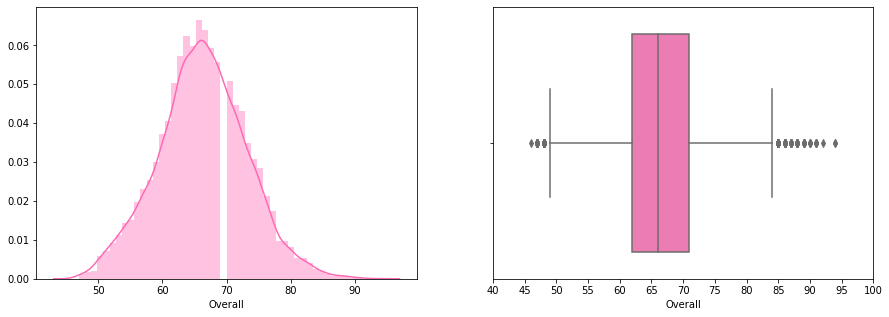

In [70]:
fig, axes = plt.subplots(1,2,figsize = (15,5))
sns.distplot(num_fifa['Overall'], color='hotpink', ax=axes[0])
sns.boxplot(num_fifa['Overall'], color='hotpink', ax=axes[1])
plt.xticks([40,45,50,55,60,65,70,75,80,85,90,95,100])
plt.savefig('overall_distribution')
plt.show()

In [71]:
print(fifa['Overall'].skew())
print(fifa['Overall'].kurt())

0.06718492227833812
0.09656866702634614


Observation :-

1. We can say that we have players from medium overall rating to the highest ratings. The overall rating data is also almost normally distributed.
2. Most of the players have overall rating ranging between 63 - 73(out of 100). So we can say that most of the players of the dataset are average and beyond with their skills.
3. We also have good count of players who are very good with their overall rating, it is observed that the highest rating is somewhere around 95 out of 100.
4. We also have few below average players in the dataset.

In [72]:
# generate pair plot for the following variables:
# Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

C:\Users\Karangula\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Karangula\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 1080x360 with 0 Axes>

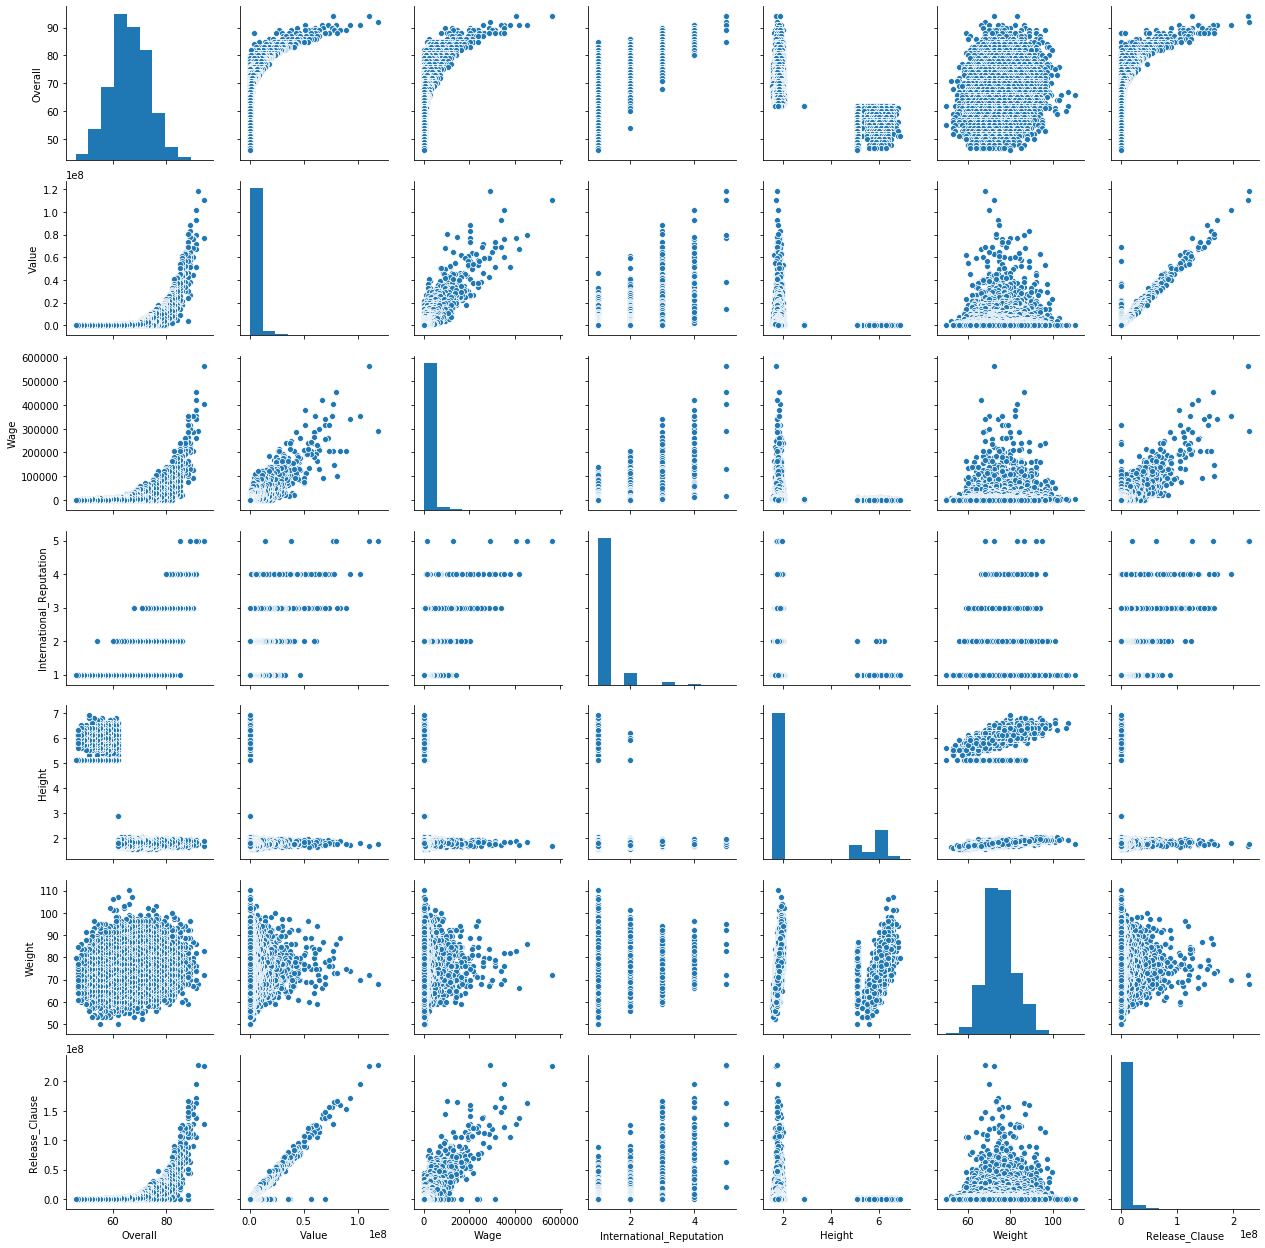

In [73]:
plt.figure(figsize=(15,5))
sns.pairplot(data=fifa, x_vars = ['Overall', 'Value', 'Wage', 'International_Reputation', 'Height', 'Weight', 'Release_Clause'], 
             y_vars = ['Overall', 'Value', 'Wage', 'International_Reputation', 'Height', 'Weight', 'Release_Clause'])
plt.savefig('pair_plot')
plt.show()

Observation :-

1. Release_clause is highly positively correlated on Value, Wage, International_Reputation, and moderately on Overall ratings.
2. Weight doesn't depend on any of the other attributes or we can say, weight doesn't affect any other mnetrics of the data.
3. Very much to our surprise we found a key relation here using our data, Height and Overall points are strongly negatively correlated. The less taller a player is, more likely he has higher overall points.
4. As expected, International_Reputation is positively correlated towards Value, Wage and Release_Clause. Overall points is very slightly correlated on International_Reputation.
5. The Higher the Wage of a player is, more will be his Value and Release_Clause.
6. Higher the Overall points, more will be their Value.


3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a)	What would the average wage for this set of players be?
b)	What is the average age?
c)	Is there a correlation between the Overall rating and Value for these players?


In [74]:
contract_2020 = fifa[pd.DatetimeIndex(fifa['Contract_Valid_Until']).year == 2020]
contract_2020

,ID,Name,Age,Overall,Potential,Value,Wage,International_Reputation,Weak_Foot,Skill_Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
3,193080,De Gea,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,91,91,93000000.0,340000.0,4.0,4.0,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,91,91,67000000.0,420000.0,4.0,4.0,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,91,91,51000000.0,380000.0,4.0,3.0,3.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
13,168542,David Silva,32,90,90,60000000.0,285000.0,4.0,2.0,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166,243621,N. Ayéva,16,48,72,70000.0,1000.0,1.0,3.0,2.0,...,44.0,14.0,19.0,16.0,10.0,9.0,8.0,7.0,6.0,158000.0
18179,246243,J. Williams,17,48,64,50000.0,1000.0,1.0,3.0,2.0,...,37.0,42.0,51.0,49.0,14.0,11.0,7.0,11.0,8.0,119000.0
18187,240158,C. Ehlich,19,47,59,40000.0,1000.0,1.0,3.0,2.0,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000.0
18189,240160,A. Kaltner,18,47,61,60000.0,1000.0,1.0,3.0,2.0,...,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,125000.0


In [75]:
contract_2020_top20 = contract_2020.sort_values(by=['Overall'], ascending = False)[:20]
contract_2020_top20

,ID,Name,Age,Overall,Potential,Value,Wage,International_Reputation,Weak_Foot,Skill_Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
3,193080,De Gea,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,91,91,67000000.0,420000.0,4.0,4.0,4.0,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,91,91,51000000.0,380000.0,4.0,3.0,3.0,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,91,91,93000000.0,340000.0,4.0,4.0,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,90,90,60000000.0,285000.0,4.0,2.0,4.0,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,89,89,60000000.0,200000.0,4.0,4.0,3.0,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,89,89,27000000.0,215000.0,4.0,3.0,2.0,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,88,91,73500000.0,205000.0,3.0,5.0,4.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,88,88,24000000.0,165000.0,4.0,3.0,2.0,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,87,87,45000000.0,135000.0,3.0,4.0,4.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


In [76]:
contract_2020_top20.describe()

,ID,Age,Overall,Potential,Value,Wage,International_Reputation,Weak_Foot,Skill_Moves,Joined,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
count,20.000000,20.000000,20.000000,20.0000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,174049.500000,30.650000,87.750000,88.0500,4.307500e+07,205450.000000,3.400000,3.400000,2.700000,2012.300000,...,81.750000,67.650000,68.650000,62.800000,17.900000,16.500000,15.400000,17.350000,18.050000,8.019500e+07
std,16191.502676,2.455391,2.149051,2.4165,2.219191e+07,94727.017765,0.502625,0.820783,0.978721,3.419757,...,6.051316,24.946838,26.176074,29.330423,24.855159,23.020586,22.767474,23.385274,25.529086,4.372562e+07
min,135507.000000,26.000000,85.000000,85.0000,9.000000e+06,38000.000000,3.000000,2.000000,1.000000,2005.000000,...,67.000000,15.000000,14.000000,13.000000,3.000000,3.000000,2.000000,4.000000,3.000000,1.530000e+07
25%,168592.250000,29.000000,86.000000,86.0000,2.675000e+07,148750.000000,3.000000,3.000000,2.000000,2011.750000,...,81.000000,57.250000,51.000000,36.500000,7.750000,6.000000,5.750000,7.000000,7.750000,4.455000e+07
50%,176473.000000,31.000000,87.000000,87.0000,3.850000e+07,190000.000000,3.000000,3.000000,3.000000,2013.000000,...,82.000000,78.000000,84.000000,82.000000,11.000000,10.000000,8.000000,10.000000,11.000000,7.580000e+07
75%,185398.250000,32.250000,89.250000,90.2500,6.000000e+07,252500.000000,4.000000,4.000000,3.250000,2014.250000,...,84.000000,87.250000,88.250000,85.000000,13.000000,12.500000,13.000000,13.250000,14.000000,1.110000e+08
max,193080.000000,35.000000,91.000000,93.0000,9.300000e+07,420000.000000,4.000000,5.000000,4.000000,2017.000000,...,93.000000,93.000000,93.000000,91.000000,90.000000,85.000000,87.000000,88.000000,94.000000,1.721000e+08


Observation :-

a) Average wage for these set of players would be 205450.000000

b) Average age for these set of players is 30.650000

In [77]:
# c)	Is there a correlation between the Overall rating and Value for these players?

contract_2020_top20[['Overall', 'Value']].corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


Observation :-

Yes there is a strong positive correlation between these players overall attribute and the value attribute.

4.	Generate tables containing the top 5 players by Overall rating for each unique position.

a)	Are there any players appearing in more than one Table. Please point out such players.

b)	What is the average wage one can expect to pay for the top 5 in every position?


In [78]:
fifa['Position'] = fifa['Position'].fillna('Missing')

In [79]:
position_features = fifa['Position'].unique()
position_features

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 'Missing'],
      dtype=object)

In [80]:
position_features_1 = position_features
print(position_features_1)

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB' 'Missing']


In [81]:
for i in range(0, len(position_features)):
    position_features_1[i] = fifa[fifa['Position'] == position_features[i]].sort_values('Overall', ascending=False)[:5]

In [82]:
result = pd.concat(position_features_1)

In [83]:
result.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,International_Reputation,Weak_Foot,Skill_Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
0,158023,L. Messi,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
50,175943,D. Mertens,31,87,87,45000000.0,135000.0,3.0,4.0,4.0,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0
528,172114,D. Valeri,32,80,80,11500000.0,12000.0,2.0,3.0,3.0,...,83.0,39.0,40.0,30.0,15.0,15.0,8.0,10.0,12.0,17300000.0
890,150516,L. Podolski,33,78,78,6500000.0,11000.0,3.0,3.0,4.0,...,79.0,54.0,39.0,39.0,10.0,9.0,16.0,9.0,9.0,8100000.0
1774,201313,C. Ciano,28,75,75,6500000.0,17000.0,1.0,4.0,4.0,...,74.0,24.0,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11700000.0
1,20801,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,188545,R. Lewandowski,29,90,90,77000000.0,205000.0,4.0,4.0,4.0,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
16,202126,H. Kane,24,89,91,83500000.0,205000.0,3.0,4.0,3.0,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
23,153079,S. Agüero,30,89,89,64500000.0,300000.0,4.0,4.0,4.0,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0
36,173731,G. Bale,28,88,88,60000000.0,355000.0,4.0,3.0,4.0,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123000000.0


In [84]:
result[result.duplicated(subset='ID')]

,ID,Name,Age,Overall,Potential,Value,Wage,International_Reputation,Weak_Foot,Skill_Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause


In [85]:
# There are no players who appeared in top 5 as per their positions.

In [86]:
avg_wage_position = result.groupby(by='Position')['Wage'].mean()

In [87]:
avg_wage_position = pd.DataFrame(avg_wage_position)

In [88]:
avg_wage_position

,Wage
Position,
CAM,174000.0
CB,139600.0
CDM,217000.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0


<Figure size 1440x720 with 0 Axes>

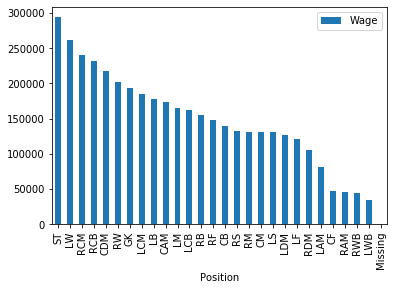

In [89]:
plt.figure(figsize=(20,10))
avg_wage_position.sort_values(by='Wage',ascending=False).plot(kind='bar')
plt.savefig('position_wage')
plt.show()

The highest 'Wage' will be given to ST followed by LW, RCM, RCB and CDM positions. Rest follows these positions with LWB being the least.